# Scope
This notebook demonstrates geopandas plotting and spatial joins using a Frog Census dataset

In [1]:
# let's import the data
# available to donwload here: https://discover.data.vic.gov.au/dataset/frog-census-records3
import pandas as pd
data = pd.read_csv('Frog_Census_Records.csv')
data.head()

,X,Y,OBJECTID,Unique_ID,Date,Time_Start,Latitude,Longitude,Type_of_observation,Scientific_name,Common_name,Number
0,336582.9095,5.848231e+06,1,1,1960/01/15 00:00:00+00,NaN,-37.498402,145.151306,Incidental,Limnodynastes dumerilii,Eastern Banjo Frog,unknown
1,336582.9095,5.848231e+06,2,2,1960/01/15 00:00:00+00,NaN,-37.498402,145.151306,Incidental,Limnodynastes dumerilii,Eastern Banjo Frog,unknown
2,336582.9095,5.848231e+06,3,3,1960/01/15 00:00:00+00,NaN,-37.498402,145.151306,Incidental,Limnodynastes dumerilii,Eastern Banjo Frog,unknown
3,336582.9095,5.848231e+06,4,4,1960/01/15 00:00:00+00,NaN,-37.498402,145.151306,Incidental,Limnodynastes dumerilii,Eastern Banjo Frog,unknown
4,336582.9095,5.848231e+06,5,5,1960/01/15 00:00:00+00,NaN,-37.498402,145.151306,Incidental,Limnodynastes dumerilii,Eastern Banjo Frog,unknown


In [2]:
data_prep = data.copy()
data_prep['Date_parsed'] = pd.to_datetime(data_prep['Date'])
data_prep[['Date','Date_parsed']].head()

,Date,Date_parsed
0,1960/01/15 00:00:00+00,1960-01-15 00:00:00+00:00
1,1960/01/15 00:00:00+00,1960-01-15 00:00:00+00:00
2,1960/01/15 00:00:00+00,1960-01-15 00:00:00+00:00
3,1960/01/15 00:00:00+00,1960-01-15 00:00:00+00:00
4,1960/01/15 00:00:00+00,1960-01-15 00:00:00+00:00


In [4]:
data_prep[data_prep.Date_parsed.dt.year >=2008].info()

<class 'pandas.core.frame.DataFrame'>
Index: 12950 entries, 18716 to 31665
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   X                    12950 non-null  float64            
 1   Y                    12950 non-null  float64            
 2   OBJECTID             12950 non-null  int64              
 3   Unique_ID            12950 non-null  int64              
 4   Date                 12950 non-null  object             
 5   Time_Start           6895 non-null   object             
 6   Latitude             12950 non-null  float64            
 7   Longitude            12950 non-null  float64            
 8   Type_of_observation  10562 non-null  object             
 9   Scientific_name      12950 non-null  object             
 10  Common_name          12950 non-null  object             
 11  Number               12950 non-null  object             
 12  Date_parsed        

In [9]:
# potential column for cleaning
(data_prep.Number.value_counts()/data_prep.shape[0]).head(30)

Number
unknown         0.742879
More than 10    0.060064
1               0.042348
1 to 3          0.035306
query           0.030506
3 to 5          0.018316
5 to 10         0.017716
2               0.008748
3               0.005590
4               0.003947
5               0.003916
5+              0.002811
10+             0.001863
20+             0.001737
6               0.001547
10              0.001516
30+             0.000947
Unknown         0.000947
1.1.1           0.000853
1 to 2          0.000663
20              0.000632
1.1.2           0.000568
50+             0.000505
1.2.1           0.000505
2 to 3          0.000505
7               0.000474
15+             0.000442
~10             0.000411
12              0.000411
~5              0.000411
Name: count, dtype: float64

<Axes: xlabel='Latitude', ylabel='Longitude'>

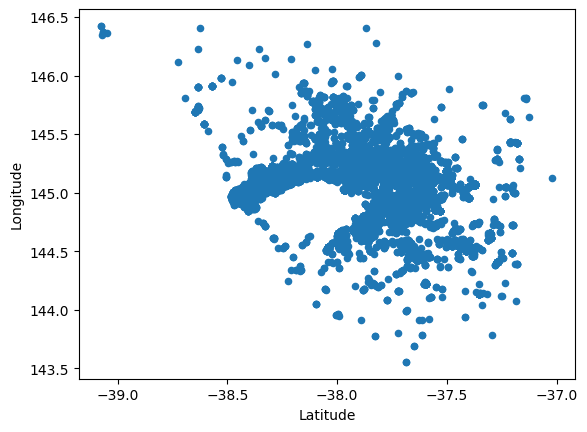

In [12]:
# pandas spatial plotting is limited, which is why we're looking at geopandas
data_prep[data_prep.Date_parsed.dt.year >=2008].plot(kind='scatter',x='Latitude',y='Longitude')

In [30]:
# we'll use this later
data_prep['year'] = data_prep.Date_parsed.dt.year

# The geopandas part

In [32]:
# make sure you have installed all the dependendencies
# !pip install geopandas folium matplotlib mapclassify

# then convert the dataframe into a geodataframe
import geopandas as gpd
gdf = gpd.GeoDataFrame(
    data_prep.drop(columns='Date_parsed'), # getting rid of timestamp as Geopandas can't manage it well
    geometry=gpd.points_from_xy(data_prep.Longitude, data_prep.Latitude), 
    crs="EPSG:4326" # coordinate reference system - this is a common one and it's good practice to check. 
)

In [35]:
# Explore helps you understand observations by region given it has a background map
# You can filter and compare
# for example 2008 observations seem concentrated towards the mornington peninsula
gdf[gdf.year==2008].explore()

In [39]:
# you can also do a spatial join to understand change in counts by suburb
# suburb data-source: https://data.gov.au/dataset/ds-dga-af33dd8c-0534-4e18-9245-fc64440f742e/details
# downloaded from the geojson link
suburbs = gpd.read_file('../suburbs.json')
suburbs.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          2973 non-null   object  
 1   lc_ply_pid  2973 non-null   object  
 2   dt_create   2973 non-null   object  
 3   dt_retire   0 non-null      object  
 4   loc_pid     2973 non-null   object  
 5   vic_locali  2973 non-null   object  
 6   vic_loca_1  0 non-null      object  
 7   vic_loca_2  2973 non-null   object  
 8   vic_loca_3  0 non-null      object  
 9   vic_loca_4  31 non-null     object  
 10  vic_loca_5  2973 non-null   object  
 11  vic_loca_6  0 non-null      object  
 12  vic_loca_7  2973 non-null   object  
 13  geometry    2973 non-null   geometry
dtypes: geometry(1), object(13)
memory usage: 325.3+ KB


In [40]:
# vic_loca_2 column is descriptive
suburbs.head()

,id,lc_ply_pid,dt_create,dt_retire,loc_pid,vic_locali,vic_loca_1,vic_loca_2,vic_loca_3,vic_loca_4,vic_loca_5,vic_loca_6,vic_loca_7,geometry
0,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.1,6670,2011-08-31,None,VIC2615,2012-04-27,None,UNDERBOOL,None,None,G,None,2,"MULTIPOLYGON (((141.74552 -35.07229, 141.74552..."
1,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.2,6671,2011-08-31,None,VIC1986,2012-04-27,None,NURRAN,None,None,G,None,2,"MULTIPOLYGON (((148.66877 -37.39571, 148.66876..."
2,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.3,6672,2011-08-31,None,VIC2862,2012-04-27,None,WOORNDOO,None,None,G,None,2,"MULTIPOLYGON (((142.92288 -37.97886, 142.90449..."
3,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.4,6673,2011-08-31,None,VIC734,2018-08-03,None,DEPTFORD,None,None,G,None,2,"MULTIPOLYGON (((147.82336 -37.66001, 147.82313..."
4,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.5,6674,2011-08-31,None,VIC2900,2012-04-27,None,YANAC,None,None,G,None,2,"MULTIPOLYGON (((141.27978 -35.99859, 141.27989..."


In [46]:
# note that suburbs has a different crs - so it will need to get changed
suburbs.crs

<Geographic 2D CRS: EPSG:4283>
Name: GDA94
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Australia including Lord Howe Island, Macquarie Island, Ashmore and Cartier Islands, Christmas Island, Cocos (Keeling) Islands, Norfolk Island. All onshore and offshore.
- bounds: (93.41, -60.55, 173.34, -8.47)
Datum: Geocentric Datum of Australia 1994
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [47]:
suburb_frog = gdf.sjoin(suburbs[['vic_loca_2','geometry']].to_crs("EPSG:4326"))
suburb_frog.head()

,X,Y,OBJECTID,Unique_ID,Date,Time_Start,Latitude,Longitude,Type_of_observation,Scientific_name,Common_name,Number,year,geometry,index_right,vic_loca_2
0,336582.9095,5.848231e+06,1,1,1960/01/15 00:00:00+00,NaN,-37.498402,145.151306,Incidental,Limnodynastes dumerilii,Eastern Banjo Frog,unknown,1960,POINT (145.15131 -37.49840),1936,WHITTLESEA
1,336582.9095,5.848231e+06,2,2,1960/01/15 00:00:00+00,NaN,-37.498402,145.151306,Incidental,Limnodynastes dumerilii,Eastern Banjo Frog,unknown,1960,POINT (145.15131 -37.49840),1936,WHITTLESEA
2,336582.9095,5.848231e+06,3,3,1960/01/15 00:00:00+00,NaN,-37.498402,145.151306,Incidental,Limnodynastes dumerilii,Eastern Banjo Frog,unknown,1960,POINT (145.15131 -37.49840),1936,WHITTLESEA
3,336582.9095,5.848231e+06,4,4,1960/01/15 00:00:00+00,NaN,-37.498402,145.151306,Incidental,Limnodynastes dumerilii,Eastern Banjo Frog,unknown,1960,POINT (145.15131 -37.49840),1936,WHITTLESEA
4,336582.9095,5.848231e+06,5,5,1960/01/15 00:00:00+00,NaN,-37.498402,145.151306,Incidental,Limnodynastes dumerilii,Eastern Banjo Frog,unknown,1960,POINT (145.15131 -37.49840),1936,WHITTLESEA


In [49]:
# top 5 suburbs for this year
suburb_frog[suburb_frog.year==2008].vic_loca_2.value_counts()

vic_loca_2
CRANBOURNE       138
FLINDERS         106
MAIN RIDGE        70
RED HILL          65
BONEO             62
                ... 
HILLSIDE           1
THOMASTOWN         1
OAKLEIGH           1
OAKLEIGH EAST      1
NIDDRIE            1
Name: count, Length: 152, dtype: int64

<Axes: ylabel='year'>

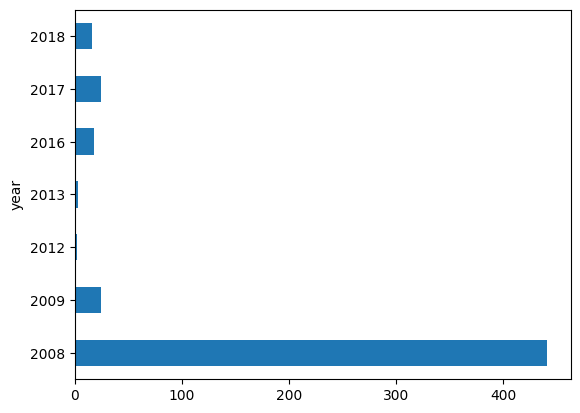

In [51]:
suburb_frog[(suburb_frog.vic_loca_2.isin(['FLINDERS','MAIN RIDGE','RED HILL','BONEO','CRANBOURNE']))&(suburb_frog.year>=2008)].groupby('year')['Unique_ID'].count().plot(kind='barh')

So what did we just see?
- We can use geopandas to explore our spatial information (lats and lons)
- We can use geopandas with other data to spatially join more information (suburb name)
- This additional information can be used to group and explore the data
    - Highlighting that the data may not be consistently captured in a given suburb over time